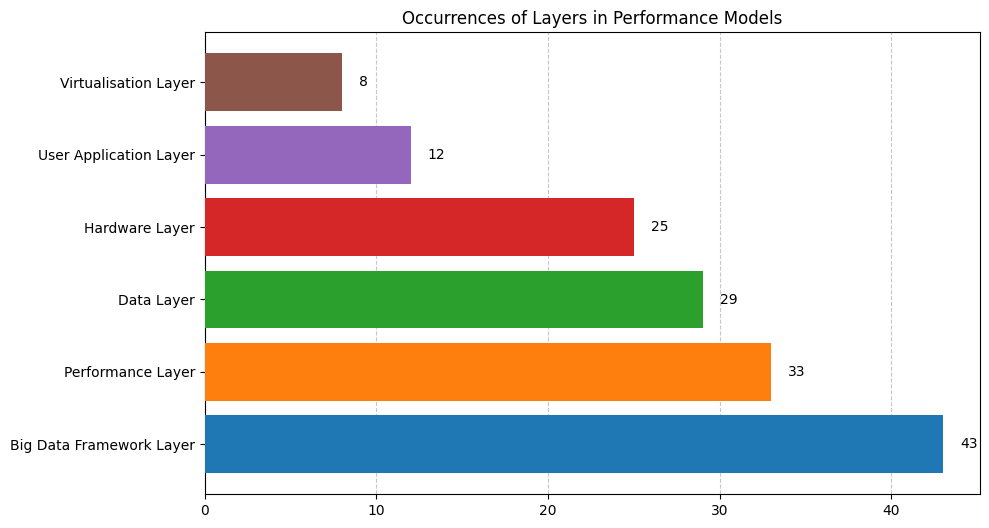

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

from data.database import data as layers_df

# Rename the columns for clarity
layers_df.columns = ['Title', 'Year', 'Layers']

# Split the layers and count the occurrences of each layer
layers_df['Layers'] = layers_df['Layers'].str.split(', ')
layer_list = layers_df['Layers'].explode().tolist()
layer_counts = Counter(layer_list)

# Prepare the data for plotting
layers, occurrences = zip(*layer_counts.most_common())  # Automatically orders by occurrences

# Creating the bar plot
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the size for better readability

# Adding a grid
ax.grid(True, axis='x', linestyle='--', alpha=0.7, zorder=0)

# Create bars
bars = ax.barh(layers, occurrences, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'], zorder=3)

# Adding data labels without the categories
for i, bar in enumerate(bars):
    ax.text(
        bar.get_width() + 1, 
        bar.get_y() + bar.get_height() / 2, 
        f'{occurrences[i]}', 
        va='center'
    )

# Setting labels and title
# ax.set_xlabel('Occurrences')
# ax.set_ylabel('Layers')
ax.set_title('Occurrences of Layers in Performance Models')

# Show plot
plt.show()
